In [2]:
#libs for Modeling and Matrices
import numpy as np
import pandas as pd

#libs for graphical analysis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#libs to ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [63]:
#reading data base Magalu Company's Stocks 2021
database = pd.read_excel("Vase_004 - Magalu - Sem Resolução.xlsx")

#checking head
database.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [7]:
database.shape

(247, 7)

In [8]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [9]:
database.describe()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,2021-07-02 21:28:25.263158016,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
min,2021-01-04 00:00:00,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,2021-04-05 12:00:00,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,2021-07-02 00:00:00,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,2021-09-29 12:00:00,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,2021-12-30 00:00:00,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984
std,NaN,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316


In [71]:
data = database.rename(columns={'Maior': 'High', 'Menor': 'Low', 'Abertura': 'Day’s Open', 'Fechamento': 'Closing Price'})

data.head()

,Data,High,Low,Day’s Open,Closing Price,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [35]:
data = data.set_index('Data').reset_index()

data.head()

,Data,High,Low,Day’s Open,Closing Price,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


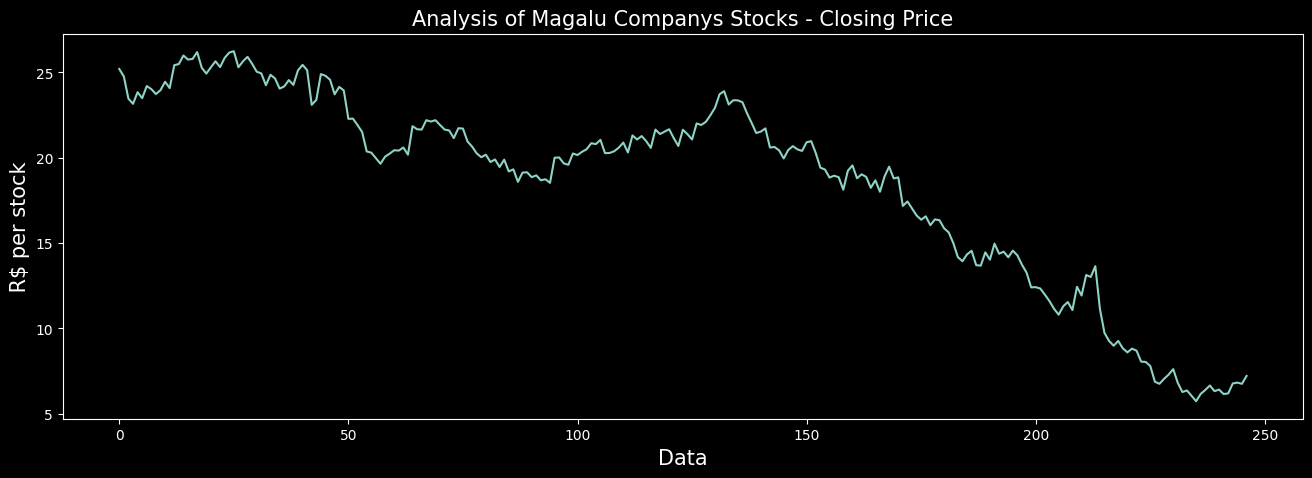

In [46]:
plt.style.use('dark_background')
plt.figure(figsize =(16,5))
plt.title('Analysis of Magalu Companys Stocks - Closing Price', fontsize=15)
plt.plot(data.index, data['Closing Price'])

plt.xlabel('Data', fontsize =15)
plt.ylabel(' R$ per stock ', fontsize =15);

In [44]:
#moving average
mean_mov = data['Closing Price'].rolling(5).mean()
#average trend
mean_trend = data['Closing Price'].rolling(30).mean()

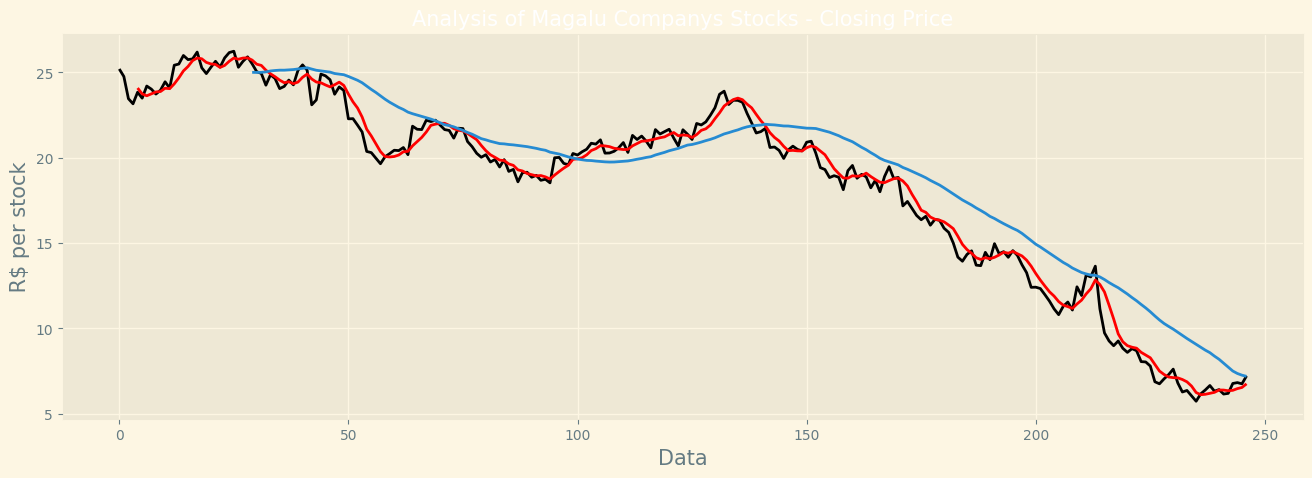

In [58]:
plt.style.use('Solarize_Light2')
plt.figure(figsize =(16,5))
plt.title('Analysis of Magalu Companys Stocks - Closing Price', fontsize=15)

plt.plot(data.index, data['Closing Price'], color='black')
plt.plot(data.index, mean_mov, color='red')
plt.plot(data.index, mean_trend)


plt.xlabel('Data', fontsize =15)
plt.ylabel(' R$ per stock ', fontsize =15);

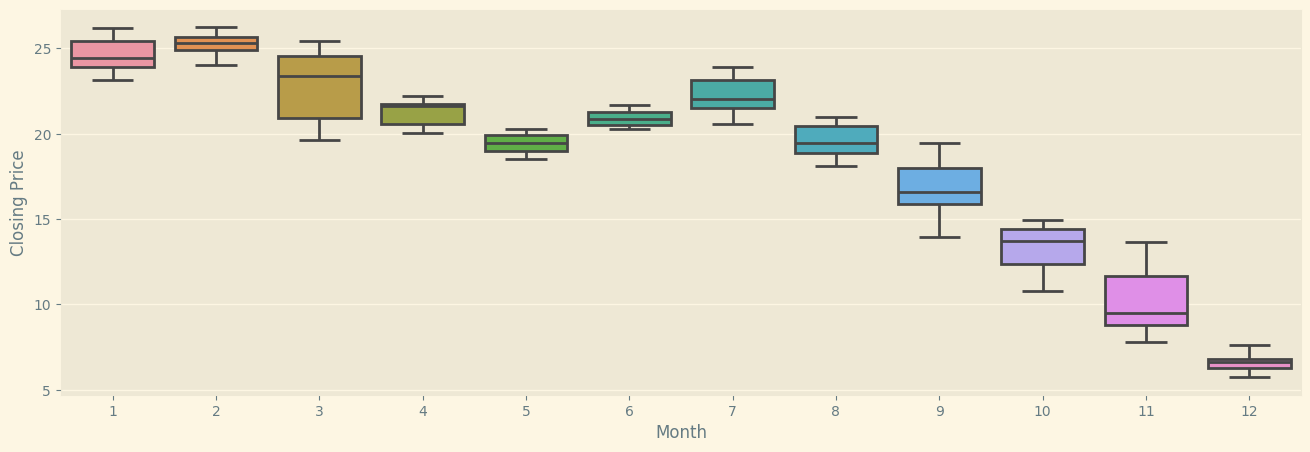

In [61]:
#Boxplot Month
data['Month'] = data['Data'].dt.month

plt.figure(figsize=(16,5))
sns.boxplot(data=data, x='Month', y='Closing Price');

In [66]:
#describe Month x Closing Price
data.groupby(['Month']).describe()['Closing Price'].reset_index()

,Month,count,mean,min,25%,50%,75%,max,std
0,1,19.0,24.644737,23.160000,23.900000,24.450001,25.455000,26.190001,0.960280
1,2,18.0,25.208889,24.049999,24.877501,25.299999,25.650000,26.240000,0.656021
2,3,23.0,22.855217,19.650000,20.940001,23.389999,24.559999,25.440001,1.976698
3,4,20.0,21.249000,20.030001,20.560000,21.625000,21.760000,22.200001,0.735297
4,5,21.0,19.430476,18.530001,18.969999,19.459999,19.900000,20.250000,0.564973
5,6,21.0,20.898095,20.270000,20.500000,20.889999,21.270000,21.670000,0.463116
6,7,21.0,22.232857,20.600000,21.530001,22.040001,23.120001,23.900000,0.977574
7,8,22.0,19.656818,18.129999,18.897500,19.485000,20.452499,20.969999,0.885827
8,9,21.0,16.746191,13.940000,15.870000,16.570000,18.010000,19.480000,1.628581
9,10,20.0,13.350000,10.810000,12.392500,13.720000,14.400000,14.970000,1.267667


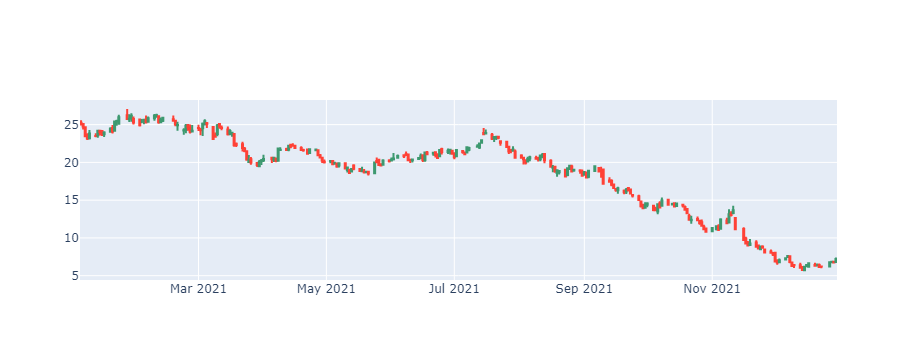

In [78]:
graph = go.Figure(
    data=[
        go.Candlestick(
            x=data['Data'],
            open=data['Day’s Open'],
            high=data['High'],
            low=data['Low'],
            close=data['Closing Price'],
        )
    ]
)
graph.update_layout(xaxis_rangeslider_visible=False)

graph.show()